<a href="https://colab.research.google.com/github/RuanRodrigues10000/ML_RUAN/blob/master/C%C3%B3pia_de_logistic_ofc_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
df = pd.read_csv('/content/titanic_train.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

PLOTS


<Axes: >

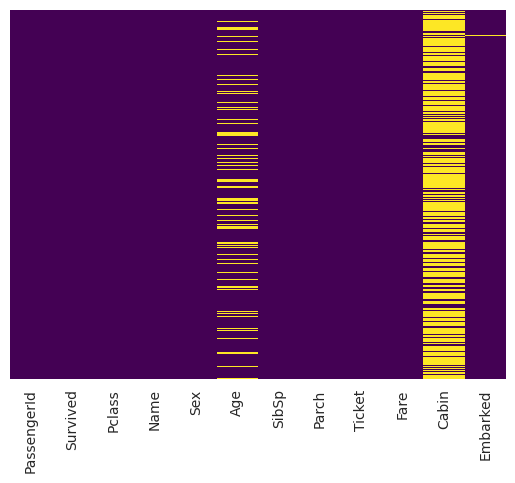

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<Axes: xlabel='Survived', ylabel='count'>

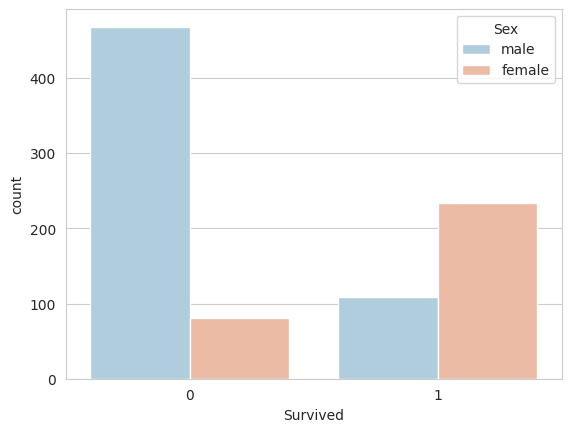

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=df,palette="RdBu_r")

In [ ]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
      if Pclass == 1:
         return 37

      elif Pclass == 2:
        return 29

      else:
        return 22



    else:
       return Age

In [ ]:
df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)

<Axes: >

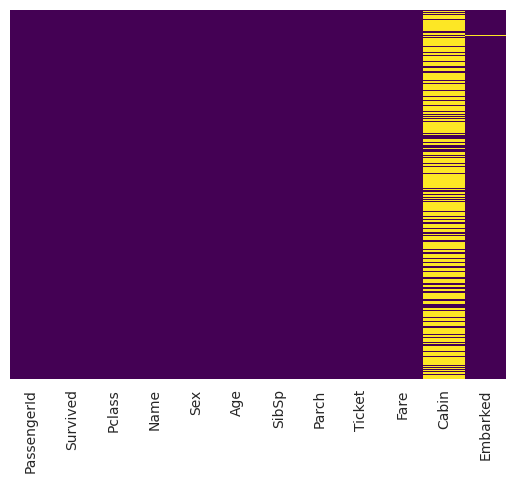

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.drop(["Sex","Embarked","Name","Ticket"], axis=1,inplace=True)

In [ ]:
sex= pd.get_dummies(df["Sex"],drop_first=True)
embarked=pd.get.dummies(df["Embarked"],drop_first=True)

### Training linear regression model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(df.drop(['Survived'],axis=1), df["Survived"], test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logm = LinearRegression()

In [ ]:
logm.fit(X_train,y_train)

LinearRegression()

##Model evaluation

Time on App (Tempo no Aplicativo): Para cada aumento de 1 unidade no tempo gasto no aplicativo, espera-se um aumento de aproximadamente $39.06 na quantidade anual gasta pelo cliente, mantendo todas as outras variáveis constantes.

Time on Website (Tempo no Site): Para cada aumento de 1 unidade no tempo gasto no site, espera-se uma diminuição de aproximadamente $2.24 na quantidade anual gasta pelo cliente, mantendo todas as outras variáveis constantes.

Isso sugere que o tempo gasto no aplicativo tem uma influência positiva significativa na quantidade anual gasta pelo cliente, enquanto o tempo gasto no site tem uma influência negativa, embora menor, na quantidade anual gasta. pode indicar que a empresa pode querer focar mais em melhorar a experiência do aplicativo móvel em comparação com o site, se o objetivo for aumentar as vendas.





 o numero negativo no site, significa que, mantendo todas as outras variáveis constantes, um aumento no tempo gasto no site está associado a uma diminuição no valor gasto anualmente pelos clientes.

que pode ser interpretado como indicativo de que o tempo gasto no site não está contribuindo positivamente para o valor gasto anualmente pelos clientes. Ou seja, clientes que passam mais tempo no site podem estar gastando menos anualmente em comparação com clientes que passam menos tempo no site.

Essa observação pode sugerir que o site pode não estar tão eficaz quanto o aplicativo móvel em influenciar os clientes a gastarem mais com a empresa. Nesse caso, pode ser necessário revisar e melhorar a experiência do usuário no site para aumentar o engajamento e, consequentemente, os gastos dos clientes.






##PREDIÇÃO

In [ ]:
pred = logm.predict(X_test)

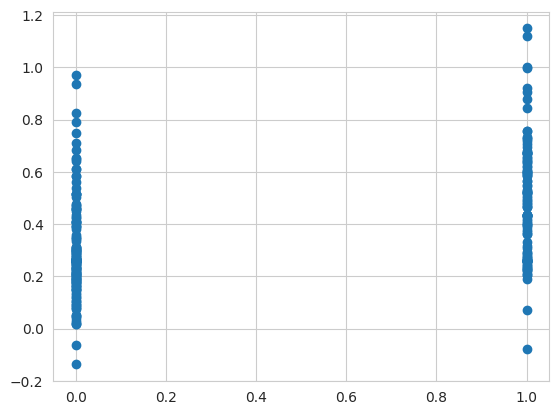

In [ ]:
plt.scatter(y_test,pred)

In [ ]:
print(classification_report(y_test,pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
metrics.plot_confusion_matrix(logm,y_test,predictions)

In [ ]:
print('MAE: ',metrics.mean_absolute_error(y_test,pred))
print('MSE: ',metrics.mean_squared_error(y_test,pred))
print('RSME:',np.sqrt(metrics.mean_squared_error(y_test,pred)))




MAE (Mean Absolute Error): O erro médio absoluto é a média das diferenças absolutas entre as previsões do modelo e os valores reais. Neste caso, o MAE é aproximadamente $54.61.

Isso significa que, em média, as previsões do modelo diferem do valor real em cerca de $54.61.

MSE (Mean Squared Error): O erro médio quadrático é a média das diferenças quadráticas entre as previsões do modelo e os valores reais. Neste caso, o MSE é aproximadamente 5201.22.

RMSE (Root Mean Squared Error): O erro quadrático médio é a raiz quadrada do MSE e fornece uma interpretação na mesma unidade da variável dependente. Neste caso, o RMSE é aproximadamente 72.12. Isso significa que, em média, as previsões do modelo diferem do valor real em cerca de $72.12.

In [ ]:
 import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de regressão para Time on App vs Yearly Amount Spent
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=df)
plt.title('Time on App vs Yearly Amount Spent')
plt.xlabel('Time on App (minutos)')
plt.ylabel('Yearly Amount Spent (USD)')
plt.grid(True)
plt.show()

# Gráfico de regressão para Time on Website vs Yearly Amount Spent
sns.lmplot(x='Time on Website', y='Yearly Amount Spent', data=df)
plt.title('Time on Website vs Yearly Amount Spent')
plt.xlabel('Time on Website (minutos)')
plt.ylabel('Yearly Amount Spent (USD)')
plt.grid(True)
plt.show()